# Principal Component Analysis (PCA) with MNIST
In this notebook, we will use PCA to perform dimensionality reduction on the MNIST dataset. The MNIST dataset is a famous dataset of handwritten digits, 0 through 9. It is often used in machine learning tutorials and is a good way to demonstrate the effectiveness of different algorithms. We will use PCA to reduce the dimensionality of the dataset and visualize the components. We further show how selecting which number of components to keep can impact the accuracy of a machine learning model.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import test_code

In [2]:
# Read in our dataset
train = pd.read_csv('data/train.csv')

In [3]:
# How many null values are in the dataset?
num_nulls = train.isnull().sum().sum()
print(f'There are {num_nulls} null values in the dataset.')

There are 114 null values in the dataset.


In [4]:
# Fill them with 0
train.fillna(0, inplace=True)

In [5]:
# Save the 'label' column (which is our target) to a Pandas series named y
y = train['label']

# Drop the 'label' feature from train
X = train.drop('label', axis=1)

### A few helper functions
If you are interested, review them and see how they can be helpful visualizing the data we are working with.

In [6]:
def show_images(num_images, X):
    """
    This function plots the num_images provided of MNIST dataset.

    INPUT: int - The number of images you would like to view.
           Mod 10 of num_images should be 0 and it should be fewer than 101 images.
    OUTPUT: A figure with the images shown for the training data.
    """
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(num_images):
            plt.subplot(num_images // 10, 10, digit_num + 1) #create subplots
            mat_data = X.iloc[digit_num].values.reshape(28, 28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
    else:
        print('That is not the right input, please read the docstring before continuing.')

In [7]:
def scree_plot(pca):
    """
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of fitted PCA object in scikit learn
            
    OUTPUT:
            None
    """
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(
            f"{vals[i] * 100:.2f}%", 
            (ind[i] + 0.2, vals[i]), 
            va="bottom",
            ha="center", 
            fontsize=12
        )
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance-Explained Ratio")
    plt.title('Explained Variance Per Principal Component')

In [8]:
def plot_component(pca, comp):
    """
    Plots an image associated with each component to understand how the weighting 
    of the components 
    INPUT: 
          pca - pca object created from PCA in sklearn
          comp - int - the component you want to see starting at 0
    OUTPUT
          None
    """
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28, 28)  #reshape images
        plt.imshow(mat_data) #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   
    else:
        print('That is not the right input, please read the docstring before continuing.')

## Data Exploration and PCA

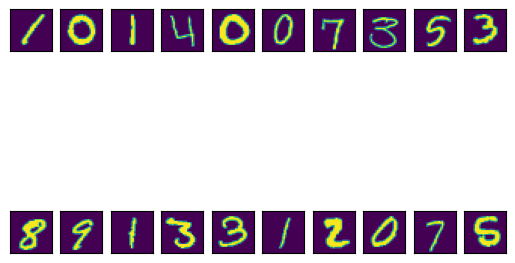

In [9]:
# Show the first 20 images
show_images(20, X)

**1.** Perform PCA on the `X` matrix using sklearn's PCA class. Reduce the original dataset of more than 700 features to only 10 principal components. Remember the steps needed to perform PCA:
1. Instantiate the model with the number of components you want - 10
2. Standardize the data, use the StandardScaler preprocessing class in sklearn
3. Fit the model
4. Transform the data to the number of components

In [10]:
# Perform PCA on the X matrix
X_standard = StandardScaler().fit_transform(X)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_standard)

In [11]:
# Let's check the shape of the original data and the transformed data
X_standard.shape, X_pca.shape

((6304, 784), (6304, 10))

In [12]:
# And the top 5 rows of the transformed data
X_pca[:5]

array([[-4.99547802, -5.87609952,  2.41070334,  2.26539401, -5.01823832,
         0.83162613, -4.77071991, -4.62919715,  0.50570182,  1.33023306],
       [19.1585168 ,  6.30634076,  1.94453955,  3.24504682, -2.82085014,
        -2.22498581,  3.34764831,  0.63003639, -4.21440925,  2.21394225],
       [-7.55158783, -2.22521271,  1.8817457 , -1.49484618, -5.17830952,
        -4.24993198,  1.1579165 ,  2.04946264,  0.23739913, -0.08617718],
       [-0.53653982,  5.0841062 ,  3.922204  , -3.65368859, -2.42438225,
         1.77190464, -5.1686943 , -0.65375986,  0.55090738, -6.32350706],
       [26.37063004,  6.83799293,  1.33632095,  4.63235134, -8.7840533 ,
        -3.10442866,  5.61875932, -1.41753862, -4.22228696,  5.0233213 ]])

In [13]:
# Output the explained variance array
pca.explained_variance_ratio_

array([0.06135278, 0.04292222, 0.04122265, 0.03205943, 0.02736555,
       0.02425957, 0.02019678, 0.01905783, 0.01699779, 0.01528851])

In [14]:
# What is the total explained variance?
total_explained_variance = pca.explained_variance_ratio_.sum()
print(f"The total explained variance is {total_explained_variance * 100:.2f}%.")

The total explained variance is 30.07%.


In [15]:
# What is the explained variance for the first two components?
first_two_explained_variance = pca.explained_variance_ratio_[:2].sum()
print(f"The explained variance for the first two components is {first_two_explained_variance * 100:.2f}%.")

The explained variance for the first two components is 10.43%.


## Explained Variance

**2.** Illustrate the explained variance per principal component using a  scree plot.

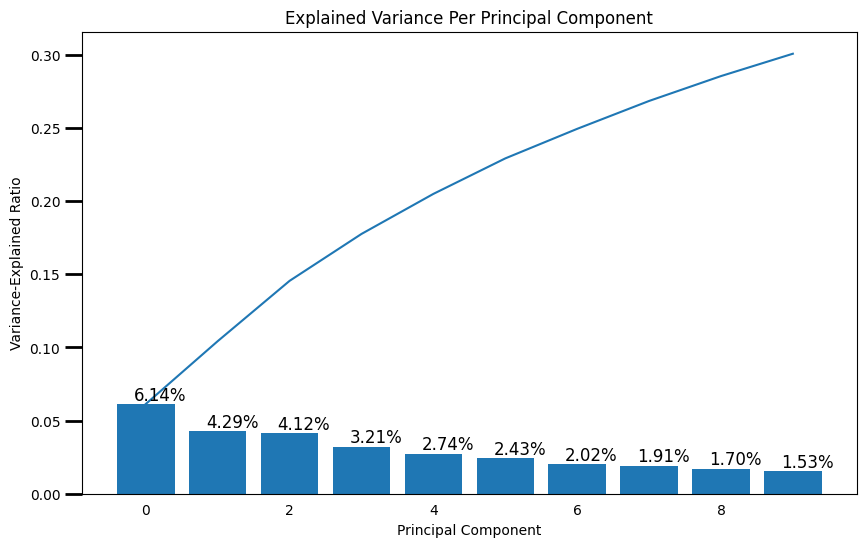

In [16]:
# Call the function scree_plot on the pca object
scree_plot(pca)

**3.** Using the results of your scree plot, match each letter as the value to the correct key in the `solution_three` dictionary.  Once you are confident in your solution run the next cell to see if your solution matches ours.

In [17]:
a = True
b = False
c = 6.14
d = 'The total amount of variability in the data explained by the first two principal components'
e = None

solution_three = {
    '10.43' : d, 
    'The first component will ALWAYS have the most amount of variability explained.': a,
    'The total amount of variability in the data explained by the first component': c,
    'The sum of the variability explained by all the components can be greater than 100%': b
}

In [18]:
# Run this cell to see if your solution matches ours
test_code.question_3_check(solution_three)

Looks good!  The amount of variability explained by each principal component gives us an idea of how much of the original variability in the original data is retained by each component.  Nice job matching these up!


## Principal Components Visualization

**4.** Use the `plot_component` function to look at each of the components (remember they are 0 indexed).  Use the results to assist with question 5.

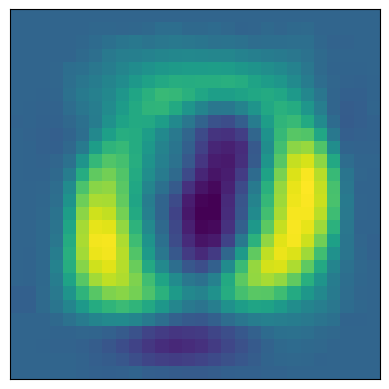

In [19]:
# Plot the first 5 components and answer question 5. What do you think each component is capturing? Use the plot_component function to view each of the components.
plot_component(pca, 0)

**5.** Using the results from viewing each of your principal component weights in question 4, change the following values of the `solution_five` dictionary to the **number of the index** for the principal component that best matches the description.  Once you are confident in your solution run the next cell to see if your solution matches ours.

In [20]:
solution_five = {
    'This component looks like it will assist in identifying zero': 0,
    'This component looks like it will assist in identifying three': 3
}

In [21]:
# Run this cell to see if your solution matches ours
test_code.question_5_check(solution_five)

Nice job!  That matches our solution as well!  The index of the first principal component appears to have really high weights where a zero would appear.  Alternatively, the fourth (third indexed component) appears to downweight where a three would appear to make it stand out.


So far from this notebook, you have had an opportunity to look at the two major parts of PCA using sklearn:

**I.** The amount or magnitude of **variance explained by each component**. What we know as the **eigenvalue**.

**II.** The principal components themselves, each component is a project of the original data onto the eigenvectors. In this case, the principal components help us understand which pixels of the image are most helpful in identifying the difference between digits.

## Random Forest Model and the Impact of PCA
We'll now use a random forest classifier to see how the number of components we use in PCA impacts the accuracy of our model. We'll start by using 2 components and then increase the number of components until we reach an accuracy of at least 90%.

In [22]:
all_accuracy = []
for n_components in range(2, 100, 2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_standard)
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.33, random_state=42
    )
    clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    acc = accuracy_score(y_test, y_preds)
    all_accuracy.append(acc)
    if acc > .90:
        print(f"With only {n_components} components, a random forest acheived an accuracy of {acc:0.2f}.".format(n_components, acc))
        print(confusion_matrix(y_test, y_preds))
        break

With only 26 components, a random forest acheived an accuracy of 0.90.
[[191   0   3   0   0   2   7   3   1   2]
 [  0 233   2   1   0   0   2   0   4   1]
 [  1   2 210   4   2   0   2   3   4   0]
 [  0   0   7 169   0   8   0   2   5   0]
 [  0   0   4   0 158   1   3   1   0  11]
 [  1   0   4   6   1 169   0   0   2   3]
 [  3   0   2   0   3   1 201   0   1   0]
 [  0   1   7   1   2   0   0 200   3  11]
 [  0   1   0  12   2   8   0   0 177   2]
 [  1   0   2   3  14   0   0  14   2 172]]


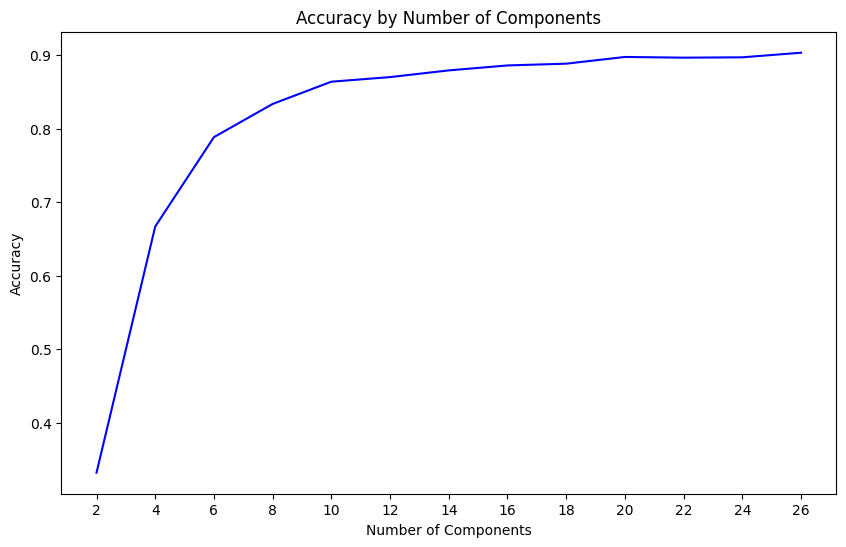

In [23]:
# Plot the accuracy by number of components
plt.figure(figsize=(10, 6))
plt.title("Accuracy by Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.xticks(range(2, n_components + 1, 2))
plt.plot(range(2, n_components + 1, 2), all_accuracy, color = 'blue', )

**6.** What is the smallest number of principal components that gives a random forest accuracy of at least 90% in predicting the handwritten digits in the MNIST dataset? What is the number of components needed to get an accuracy of ~80%?

In [24]:
solution_six = {
    "n_components_90": n_components,
    "n_components_80": 6
}

In [25]:
# Run this cell to see if your solution matches ours
test_code.question_6_check(solution_six)

Great work!  You've identified that you need about 20-40 components to explain 90% of the variability in the data.  This is a good number to use for reducing the dimensionality of the data.
Awesome!  You've identified that you need about 5-10 components to explain 80% of the variability in the data.  This is a good number to use for reducing the dimensionality of the data.
